# Lending Club Case Study

<font color='#1D8348'> **The case study analyzing different factors affecting loan default through exploratory data analysis** 

**Problem Statement**

The company is the largest online loan marketplace, facilitating personal loans, business loans and financing of medical procedues. Borrowers can easily access lower interest rate loans through fast online interface. This analysis would try identify some of the basic features of the defaulters and major factors behind the loan default: Some possible questions that can be asked:
- Does lower credit score lead to loan default ? 
- Is salary impacting loan default?

### Section 1: Data Handling and Cleaning

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
plt.style.use('ggplot')

In [2]:
# reading the dataset
data = pd.read_csv("loan.csv")
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [3]:
# checking the data structure
data.shape

(39717, 111)

#### Filtering relevant data
__loan status__ can be considered the __'target variable'__ in this dataset.

- Since the objective is to analyze factors impacting loan default we will filter out the data using the __loan_status__ column to __Fully Paid__ & __Charged Off__ instances where the final loan status is known.
- Since __Current__ status means the loan is still being repaid so the default or non-default status cannot be gauged. Hence we will filter out those transactions.

In [4]:
# Filtering out current loans
data_paid_charged_off = data[data['loan_status']!="Current"]
# Checking the distribution of Fully Paid and Charged Off status
data_paid_charged_off.loan_status.value_counts(normalize=True)*100

Fully Paid    85.41
Charged Off   14.59
Name: loan_status, dtype: float64

We can see from the above distribution that the __loan default rate__ is __~15%__.

#### Missing Values Treatment - Phase 1

In [5]:
# checking for missing values 
null_values = (data_paid_charged_off.isna().sum()/data_paid_charged_off.shape[0])*100

null_values[null_values>0]

emp_title                          6.19
emp_length                         2.68
desc                              32.47
title                              0.03
mths_since_last_delinq            64.56
mths_since_last_record            92.90
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                     100.00
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.15
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


We can see from the above table that there are quite a bit of columns which are __completely blank__ or __more than 30% of their values missing__ which also will not be very useful.\
Hence we will remove these columns.\
For the columns which have some values missing we will devise an imputation strategy based upon the use of the column in the eventual analysis a little later.

In [6]:
# removing columns which have greater than 30% missing values
data_paid_charged_off.drop(null_values[null_values > 30].index, axis=1,inplace=True)

In [7]:
# checking for unique values in the remaining columns
unique_values = data_paid_charged_off.nunique()
unique_values[(unique_values==1) | (unique_values==len(data_paid_charged_off.index))]

id                            38577
member_id                     38577
pymnt_plan                        1
url                           38577
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
tax_liens                         1
dtype: int64

- We can see from the above table that there are a few columns which have a single value. 
- There all also a few columns have all unique values upon checking we can understand that these columns basiclly unique member ids and urls for loan details.\
There columns do not add any value to the analysis so they can also be ignored

In [8]:
# removing all those columns
data_paid_charged_off.drop(unique_values[(unique_values==1) | (unique_values==len(data_paid_charged_off.index))].index,
                           axis=1,inplace=True)

In [9]:
# checking for remainin columns
data_paid_charged_off.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

There are certain columns which can also be removed as they don't seeme to very useful for the analysis:
- __emp_title__ : this column has names of organizations the borrowers are working for.
- __title__ : this column has input ftom the borrowers regarding the purpose for the taking the loan. This column is similar to purpose column which has got cleaner data.
- __zip code__ : these are incomplete zip codes (first 3 letters only) provided by the borrowers.
- __total_pymnt__, __total_pymnt_inv__, __total_rec_prncp__, __total_rec_int__, __total_rec_late_fee__, __recoveries__, __collection_recovery_fee'__ , __last_pymnt_d__, __last_pymnt_amnt__ and __last_credit_pull_d__ : all these columns are providing information regarding behavior post the loan is sanctioned, since we are trying to evaluate default characteristics at the application stage these are not useful.

In [10]:
# retaining all columns relevant for the analysis
data_paid_charged_off = data_paid_charged_off[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 
                                               'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 
                                               'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 
                                               'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 
                                               'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
                                               'pub_rec_bankruptcies']]

In [11]:
# checking percentage variables defined as text - int_rate, revol_util and also checking term variable for alignment issues
print(data_paid_charged_off["term"].unique())
print(data_paid_charged_off["int_rate"].head(2))
print(data_paid_charged_off["revol_util"].head(2))

[' 36 months' ' 60 months']
0    10.65%
1    15.27%
Name: int_rate, dtype: object
0    83.70%
1     9.40%
Name: revol_util, dtype: object


We see that the column __term__ has leading whitespaces and columns __int_rate__ & __revol_util__ cannot be used in their current format.  
Cleaning these columns by removing unwanted text (__% sign__) and whitespaces and also converting them to a correct format if required.

In [12]:
# removing % sign and changing the percentage columns from string to float
data_paid_charged_off["int_rate"] = pd.to_numeric(data_paid_charged_off["int_rate"].str.replace("%","")).astype(float)
data_paid_charged_off["revol_util"] = pd.to_numeric(data_paid_charged_off["revol_util"].str.replace("%","")).astype(float)
# removing whitespaces of the term variable
data_paid_charged_off["term"] = data_paid_charged_off["term"].str.strip()

We have obsereved initially while checking the data types that there are certain date columns which are stored as string variables changing them to datetime variable. \
Whilst changing the columns to datatime format we face certain issues with the year conversion because of the original format of these variables the below code block also takes of that aspect  

In [13]:
# changing the date columns to datetime formats and correcting the year part wherever applicable
data_paid_charged_off["issue_d"] = pd.to_datetime(data_paid_charged_off["issue_d"],format='%b-%y',yearfirst=True)
data_paid_charged_off["earliest_cr_line"] = pd.to_datetime(data_paid_charged_off["earliest_cr_line"],format="%b-%y")
data_paid_charged_off["earliest_cr_line"]  = data_paid_charged_off["earliest_cr_line"].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

#### Missing Value Treatment - Phase 2

In [14]:
# checking for missing values
pct_missing_values = round((data_paid_charged_off.isnull().sum()/data_paid_charged_off.shape[0])*100,2)
pct_missing_values

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.13
total_acc              0.00
pub_rec_bankruptcies   1.81
dtype: float64

 - After filtering and cleaning of the data there are certain columns that still have missing values. Following approach has been taken to impute the same:
      - __pub_rec_bankruptcies__ - this column has majority values as 0. Since the percentage missing values is very small. replacing those with the mode.
      - __revol_util__ - after checking the corresponding value for revolving balance it has been foud out that it is 0 since there is no balance for utilization replacing values with 0.
      - __emp_length__ - one way of treating the missing values for this column could be again replacing with mode. But since the employee tenure is unknown for these instances replacing them with the value 'Unknown'. 

In [15]:
# missing value imputation
data_paid_charged_off["pub_rec_bankruptcies"] = data_paid_charged_off["pub_rec_bankruptcies"].fillna(data_paid_charged_off["pub_rec_bankruptcies"].mode()[0])
data_paid_charged_off["revol_util"] = data_paid_charged_off["revol_util"].fillna(0)
data_paid_charged_off['emp_length'] = data_paid_charged_off['emp_length'].fillna('Unknown')

#### Derived Columns Addition 
- Adding date related columns like __year__ and __month__ for __issue_date__ & __earliest_cred_line_date__ columns
- Along with that added 2 new columns:
    - __funded amount to loan ratio__: The funded ratio can help assess the level of investor confidence in a loan. A higher funded ratio indicates that a larger proportion of the requested loan amount was successfully funded, which could be a positive sign for the borrower. Conversely, a lower funded ratio might suggest higher risk or less investor interest in that particular loan. 
    -__funded amnt invested to funded amount ratio__: A higher funded ratio indicates that a larger proportion of the committed funds were successfully disbursed to the borrower. Conversely, a lower funded ratio suggests that a smaller portion of the committed funds was utilized for the loan.
        In summary, the funded ratio provides valuable information about investor participation and the efficiency of loan disbursement within the Lending Club platform.

In [16]:
# adding new columns
data_paid_charged_off['funded_amount_to_loan_ratio'] = round(data_paid_charged_off.funded_amnt
                                                             /data_paid_charged_off.loan_amnt,3)
data_paid_charged_off['funded_amount_inv_to_funded_amnt_ratio'] = round(data_paid_charged_off.funded_amnt_inv
                                                                        /data_paid_charged_off.funded_amnt,3)
data_paid_charged_off['issue_year'] = pd.DatetimeIndex(data_paid_charged_off['issue_d']).year
data_paid_charged_off['issue_month'] = pd.DatetimeIndex(data_paid_charged_off['issue_d']).month_name()
data_paid_charged_off['earliest_cred_line_year'] = pd.DatetimeIndex(data_paid_charged_off['earliest_cr_line']).year
data_paid_charged_off['earliest_cred_line_month'] = pd.DatetimeIndex(data_paid_charged_off['earliest_cr_line']).month_name()

In [17]:
# overall summarry
data_paid_charged_off.describe(percentiles=[0.05,0.10,0.25,0.50,.75,.80,.85,.90,.95,.99])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,funded_amount_to_loan_ratio,funded_amount_inv_to_funded_amnt_ratio,issue_year,earliest_cred_line_year
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00
mean,11047.03,10784.06,10222.48,11.93,322.47,68777.97,13.27,0.15,0.87,9.28,0.06,13289.49,48.64,22.05,0.04,0.99,0.95,2010.31,1996.60
std,7348.44,7090.31,7022.72,3.69,208.64,64218.68,6.67,0.49,1.07,4.40,0.24,15866.49,28.40,11.43,0.20,0.07,0.16,0.88,6.82
min,500.00,500.00,0.00,5.42,15.69,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.10,0.00,2007.00,1946.00
5%,2400.00,2400.00,1800.00,6.17,70.61,24000.00,2.10,0.00,0.00,3.00,0.00,312.00,2.50,7.00,0.00,1.00,0.63,2009.00,1984.00
10%,3090.00,3000.00,2825.00,7.14,98.99,30000.00,4.06,0.00,0.00,4.00,0.00,1099.00,8.30,9.00,0.00,1.00,0.92,2009.00,1988.00
25%,5300.00,5200.00,5000.00,8.94,165.74,40000.00,8.13,0.00,0.00,6.00,0.00,3650.00,25.10,13.00,0.00,1.00,0.99,2010.00,1993.00
50%,9600.00,9550.00,8733.44,11.71,277.86,58868.00,13.37,0.00,1.00,9.00,0.00,8762.00,49.00,20.00,0.00,1.00,1.00,2011.00,1998.00
75%,15000.00,15000.00,14000.00,14.38,425.55,82000.00,18.56,0.00,1.00,12.00,0.00,16912.00,72.20,29.00,0.00,1.00,1.00,2011.00,2001.00
80%,16000.00,16000.00,15000.00,15.21,480.33,90000.00,19.71,0.00,2.00,13.00,0.00,19617.00,77.20,31.00,0.00,1.00,1.00,2011.00,2002.00


While we will look at the individual variables in detail following are the observations looking at the overall summary: 
- __annual_inc__ : whilst 75% of the borrowers have thier annual income to be less than 80k there are certain high income individuals. They can be treated as outliers and excluded from the analysis. we can decide the threshold to be 95% value for the charged customers as that is the focus area.
- __loan_amnt__ : 75% of the borrowers are applying for less than 15k. 
- __funded_amnt__ & and __funded_amnt_inv__ : comparing the values with the loan amount we can see that most of the applied amounts and getting approved and paid out to the borrowers.
- __int_rate__ : borrowers are paying approximately in the range 10 to 20%.
- __dti__ : is less than 30 which is considered to be the acceptable value in the industry.
- __delinq_2yrs__ : most of the customers have not had any reported delinquencies in the last 2 years.
- __open_acc__ : there multiple open credit lines which means for the borrowers could be cause of concerns
- __revol_bal__ :  Revolving balance seems to a bit high. This is in a way is good for LC as revolving balance accrues interest but higher revolving balance may indicate that a borrower is relying too much on credit which can hurt his credit score.
- __revol_util__ : Revolving utilization rate compares your credit debt to your total credit limit and it is normally recommended to keep the utilization rate as low as possible with anything below 30% considered acceptable. The data suggests that utilization is higher which could again be a cause of concern.

#### Outlier treatment on Annual Income
As suggested above whilst 75% of the borrowers have thier annual income to be less than 80k there are certain high income individuals. They can be treated as outliers and excluded from the analysis. we can decide the threshold to be 95% value for the charged customers as that is the focus area.

#####  Step 1: Charge Off Analysis (subsetting the data)

Since the analysis is predominantly to understand the contributing factors to loan default and general profile of the loan defaulters the analysis will try focus in the __charged off__ instances to begin with 

The relevant comparison the fully paid customers has been done later to understand: 
 - difference in behaviour if any and
 - difference in loan terms if any

Hence a subset of the data with only defaulter information has been predominantly used for the analysis

In [18]:
# created data subset for loan default instances
data_charged_off = data_paid_charged_off[data_paid_charged_off['loan_status']=="Charged Off"]
data_charged_off.shape

(5627, 32)

##### Step 2:

Checking for distribution of annual income for Charged Off borrowers

In [19]:
data_charged_off['annual_inc'].describe(percentiles=[0.05,0.10,0.25,0.50,.75,.80,.85,.90,.95,.99])

count      5627.00
mean      62427.30
std       47776.01
min        4080.00
5%        21600.00
10%       26500.00
25%       37000.00
50%       53000.00
75%       75000.00
80%       80000.00
85%       90000.00
90%      103020.00
95%      129697.20
99%      205960.00
max     1250000.00
Name: annual_inc, dtype: float64

##### Step 3:

Excluding data above __95% threshold__ which is __129697__ for the whole data

In [20]:
# Removing outliers for annual income
data_paid_charged_off_inc_norm = data_paid_charged_off[data_paid_charged_off.annual_inc < 129697]
# creating dataset for Charged Off customers
data_charged_off_inc_norm = data_paid_charged_off_inc_norm[data_paid_charged_off_inc_norm.loan_status=='Charged Off']

In [21]:
# Checking for default rate of cleanind data
data_paid_charged_off_inc_norm.loan_status.value_counts(normalize=True)

Fully Paid    0.85
Charged Off   0.15
Name: loan_status, dtype: float64

In [22]:
# Checking for data shape
print(data_paid_charged_off_inc_norm.shape, data_charged_off_inc_norm.shape)

(35930, 32) (5345, 32)


### Section 2: Exploratory Data Analysis

#### Univariate Analysis

In [23]:
# Checking for Overall Summary
data_charged_off_inc_norm.describe(percentiles=[0.05,0.10,0.25,0.50,.75,.80,.85,.90,.95,.99])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,funded_amount_to_loan_ratio,funded_amount_inv_to_funded_amnt_ratio,issue_year,earliest_cred_line_year
count,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00,5345.00
mean,11739.29,11411.66,10552.75,13.75,325.90,55368.63,14.14,0.17,1.05,9.06,0.09,12553.48,55.14,21.02,0.07,0.98,0.93,2010.37,1997.14
std,7840.72,7529.47,7409.56,3.63,209.39,25111.43,6.59,0.53,1.15,4.46,0.29,13436.93,28.03,11.27,0.25,0.08,0.19,0.89,6.70
min,900.00,900.00,0.00,5.42,22.79,4080.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.15,0.00,2007.00,1962.00
5%,2205.00,2200.00,1575.00,7.51,67.85,21127.60,2.44,0.00,0.00,3.00,0.00,304.40,3.40,6.00,0.00,0.86,0.41,2008.00,1984.00
10%,3000.00,3000.00,2500.00,8.90,96.85,26004.00,4.65,0.00,0.00,4.00,0.00,1069.40,13.54,8.00,0.00,1.00,0.86,2009.00,1988.00
25%,5500.00,5225.00,4975.00,11.22,166.63,36000.00,9.23,0.00,0.00,6.00,0.00,3858.00,33.90,12.00,0.00,1.00,0.99,2010.00,1994.00
50%,10000.00,10000.00,9000.00,13.49,284.41,51000.00,14.46,0.00,1.00,8.00,0.00,8840.00,57.90,19.00,0.00,1.00,1.00,2011.00,1998.00
75%,16000.00,15475.00,14975.00,16.32,439.03,70000.00,19.44,0.00,2.00,11.00,0.00,16619.00,78.60,28.00,0.00,1.00,1.00,2011.00,2001.00
80%,18000.00,17460.00,16000.00,16.82,489.28,75000.00,20.45,0.00,2.00,12.00,0.00,19080.00,82.60,30.00,0.00,1.00,1.00,2011.00,2003.00


Most of the observations recorded above apply to this data as well:

- __loan_amnt__ : 75% of the borrowers are applying for less than 15k. 
- __funded_amnt__ & and __funded_amnt_inv__ : comparing the values with the loan amount we can see that most of the applied amounts and getting approved and paid out to the borrowers.
- __int_rate__ : borrowers are paying apprximately in the range.
- __dti__ : is less than 30 which is considered to be the acceptable value in the industry.
- __delinq_2yrs__ : most of the customers have not had any reported delinquencies in the last 2 years.
- __open_acc__ : there multiple open credit lines which means for the borrowers could be cause of concerns
- __revol_bal__ :  Revolving balance seems to a bit high. This is in a way is good for LC as A revolving balance accrues interest but higher revolving balance may indicate that a borrower is relying too much on credit can hurt his credit score.
- __revol_util__ : Revolving utilization rate compares your credit debt to your total credit limit and it is normally recomended to keep the utilization rate as low as possible with anything below 30% considered acceptable. The data suggests that utilization is higher which could again be a cause of concern.

#### Creating custom functions:
With the idea to automate repetitve tasks certain custom functions have been created for proceesing the data into a certain format and generating charts used for visual analysis

In [24]:
# Creating function for value counts 
def get_value_counts(dataframe, column_name):
    """
    Returns a Series with value counts for a specific column in the given DataFrame.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, name of the column for which value counts are needed

    Returns:
    - pandas Series with unique values as index and their corresponding counts
    """
    value_counts_series = dataframe[column_name].value_counts(normalize=True)
    
    df_value_counts = pd.DataFrame({'unique_values': value_counts_series.index,
                                    'counts': value_counts_series.values})
    
    df_value_counts.counts = round(df_value_counts.counts*100,2)
    
    column_names = list(df_value_counts.columns)
    
    return df_value_counts, column_names, column_name   

In [25]:
# Creating function for barplot
def custom_barplot(dataframe,x_col,y_col,colname):
    '''
    creates bar plot
    
    Parameters:
    - dataframe: pandas DataFrame
    - x_col: str, name of the column for x-axis
    - y_col: str, name of the column for y-axis
    
    Returns:
    plots the barplot
    '''
    plt.figure(figsize=(18,5))
    ax = sns.barplot(x=x_col,y=y_col,data=dataframe)
    ax.bar_label(ax.containers[0])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    if colname =='purpose'or colname == 'earliest_cred_line_year': 
        plt.xticks(rotation=45,ha='right')
    else:
        plt.xticks(rotation=0)
    plt.suptitle(Title,fontsize=15)
    plt.show()
    

In [26]:
# Creating a function to create boxplot and histogram
def custom_boxplot_distplot(dataframe,x_col):
    '''
    creates boxplot and a histogram 
    
    Parameters:
    - dataframe: pandas DataFrame
    - x_col: str, name of the column for x-axis
        
    Returns:
    plots the barplot and histogram
    subplots used plotting grpahs side by side
    
    summary added with percentiles at the bottom
    '''
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(dataframe[x_col],rug=True,color='royalblue')
    plt.subplot(1,2,2)
    sns.boxplot(data=dataframe,x=x_col)
    plt.suptitle(Title,fontsize=15)
    plt.show()
    print(dataframe[x_col].describe(percentiles=[0.05,0.10,0.25,0.50,.75,.80,.85,.90,.95,.99]))

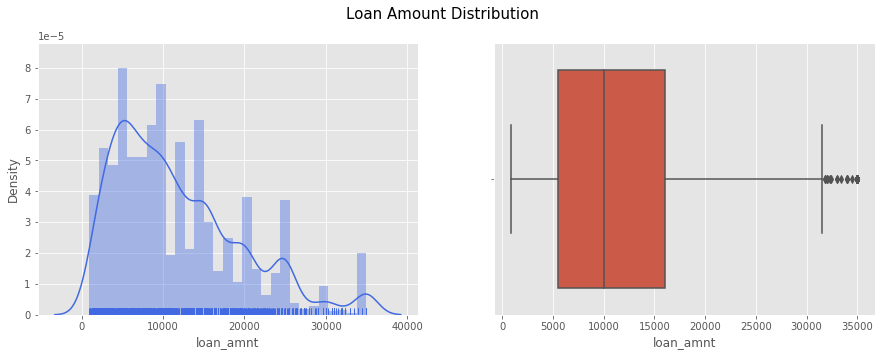

count    5345.00
mean    11739.29
std      7840.72
min       900.00
5%       2205.00
10%      3000.00
25%      5500.00
50%     10000.00
75%     16000.00
80%     18000.00
85%     20000.00
90%     24000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64


In [27]:
# Loan Amount Distribution
Title = 'Loan Amount Distribution'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='loan_amnt')

- 75% of the defaulters are applying for less than 15k.

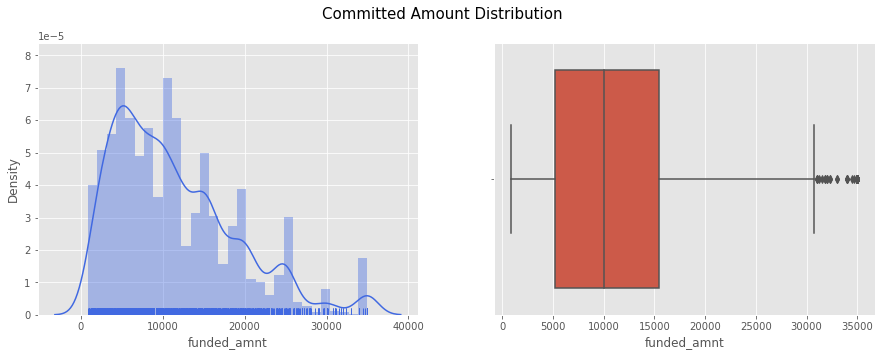

count    5345.00
mean    11411.66
std      7529.47
min       900.00
5%       2200.00
10%      3000.00
25%      5225.00
50%     10000.00
75%     15475.00
80%     17460.00
85%     20000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: funded_amnt, dtype: float64


In [28]:
# Committed Amount Distribution
Title = 'Committed Amount Distribution'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='funded_amnt')

- Comparing the distribution for loan amount and funded amount we can say that most of the applied amounts have been approved

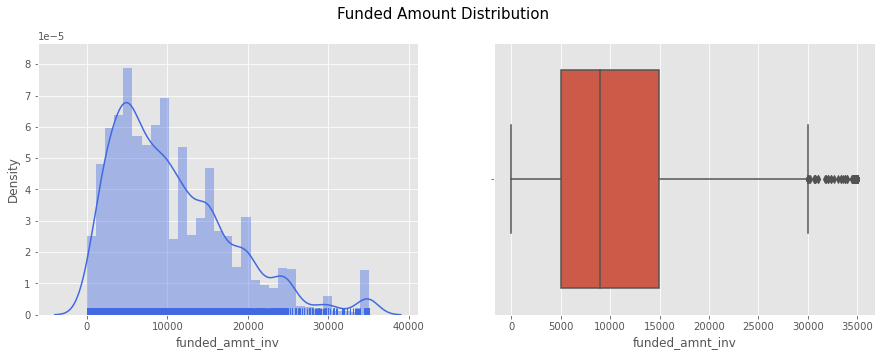

count    5345.00
mean    10552.75
std      7409.56
min         0.00
5%       1575.00
10%      2500.00
25%      4975.00
50%      9000.00
75%     14975.00
80%     16000.00
85%     18337.89
90%     20447.13
95%     24900.00
99%     34950.00
max     35000.00
Name: funded_amnt_inv, dtype: float64


In [29]:
# Funded Amount Distribution
Title = 'Funded Amount Distribution'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='funded_amnt_inv')

- Same insight can be drawn from the above charts and the previous charts almost the entirety of the amount has been disbursed   

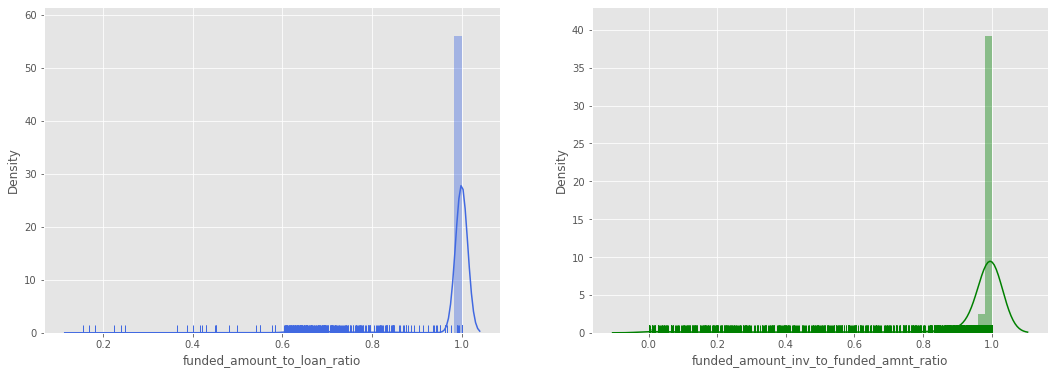

In [30]:
# Loan to Committed and Comitted to Funded Distribution
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(data_charged_off_inc_norm['funded_amount_to_loan_ratio'],rug=True,color='royalblue')
plt.subplot(1,2,2)
sns.distplot(data_charged_off_inc_norm['funded_amount_inv_to_funded_amnt_ratio'],rug=True,color='green')
plt.show()

- These 2 plots further validate the findings related to loan amount, funded amount and funded amount invested columns

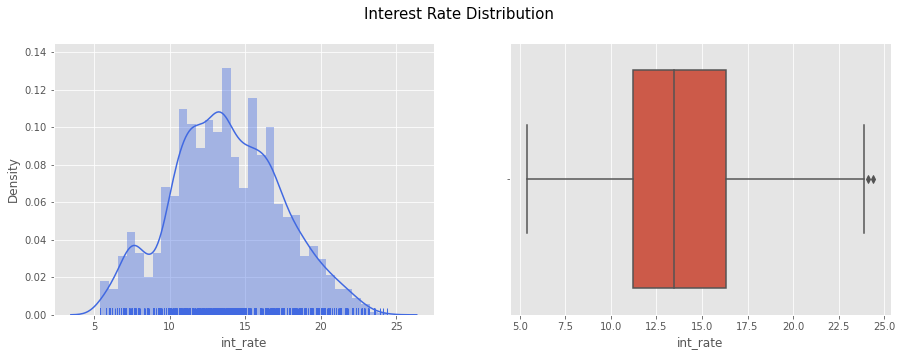

count   5345.00
mean      13.75
std        3.63
min        5.42
5%         7.51
10%        8.90
25%       11.22
50%       13.49
75%       16.32
80%       16.82
85%       17.56
90%       18.64
95%       19.91
99%       22.06
max       24.40
Name: int_rate, dtype: float64


In [31]:
# Interest Rate Distribution
Title = 'Interest Rate Distribution'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='int_rate')

- Interest rates range between __9%__ to __16%__. Some customers end up paying higher interest rates. 

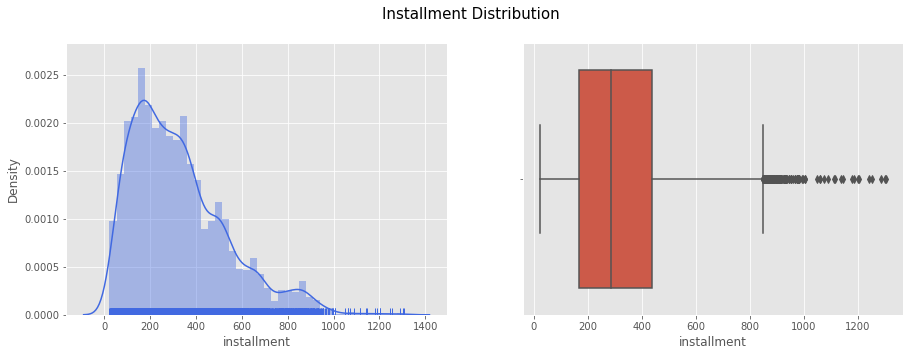

count   5345.00
mean     325.90
std      209.39
min       22.79
5%        67.85
10%       96.85
25%      166.63
50%      284.41
75%      439.03
80%      489.28
85%      535.24
90%      620.29
95%      765.00
99%      923.81
max     1305.19
Name: installment, dtype: float64


In [32]:
# Installment Distribution
Title = 'Installment Distribution'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='installment') 

- Most of the installments are below 1000 and 3/4th of them are paying lest than 500 

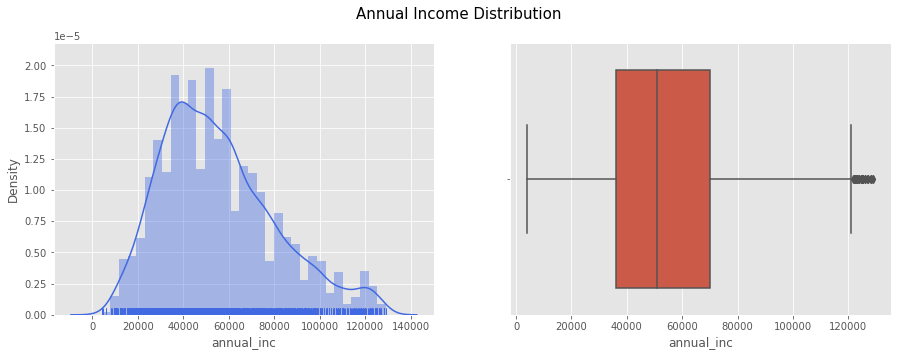

count     5345.00
mean     55368.63
std      25111.43
min       4080.00
5%       21127.60
10%      26004.00
25%      36000.00
50%      51000.00
75%      70000.00
80%      75000.00
85%      82000.00
90%      90174.00
95%     105000.00
99%     123000.00
max     129000.00
Name: annual_inc, dtype: float64


In [33]:
# Annual Income Distribution
Title = 'Annual Income Distribution'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='annual_inc')

Median income is below 50k. Majority of the defaulters are below 100k. 

As per the U.S. Census Bureau median household income in the United States in 2011 was 50,054 USD.

Considering the above statistic and the fact that most the data from 2011 the defaulters seem to be mostly belonging to slightly higher income group. 

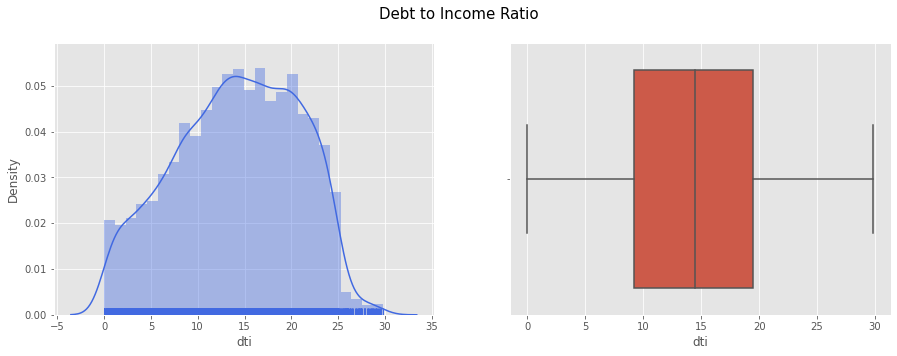

count   5345.00
mean      14.14
std        6.59
min        0.00
5%         2.44
10%        4.65
25%        9.23
50%       14.46
75%       19.44
80%       20.45
85%       21.51
90%       22.66
95%       23.95
99%       26.10
max       29.85
Name: dti, dtype: float64


In [34]:
# Debt to Income Distribution
Title = 'Debt to Income Ratio'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='dti')

- debt to income ratio is below 30 for all the defaulters which is acceptable rate as per the industry

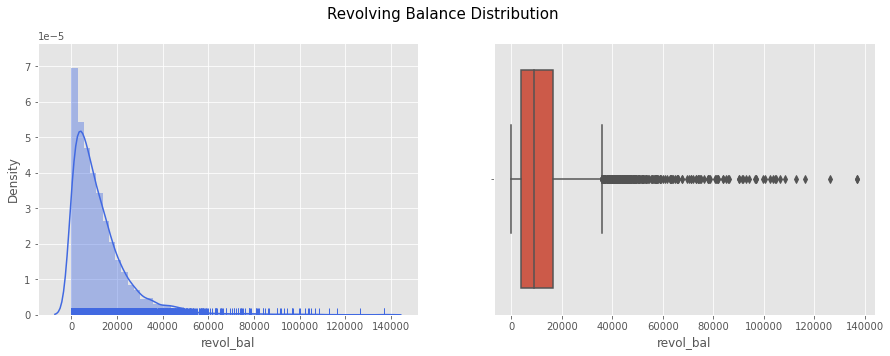

count     5345.00
mean     12553.48
std      13436.93
min          0.00
5%         304.40
10%       1069.40
25%       3858.00
50%       8840.00
75%      16619.00
80%      19080.00
85%      22475.40
90%      27376.80
95%      36782.20
99%      65834.92
max     137112.00
Name: revol_bal, dtype: float64


In [35]:
# Revolving Balance Distribution
Title = 'Revolving Balance Distribution'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='revol_bal')

- Revolving balance seems to be below 20k for majority of the defaulters.

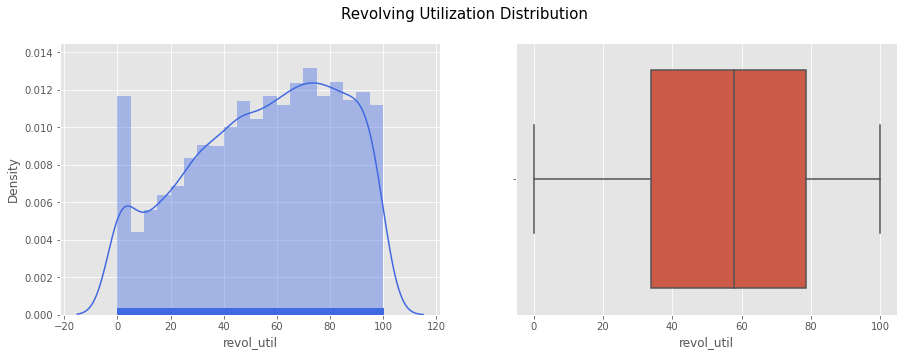

count   5345.00
mean      55.14
std       28.03
min        0.00
5%         3.40
10%       13.54
25%       33.90
50%       57.90
75%       78.60
80%       82.60
85%       87.00
90%       91.10
95%       95.40
99%       99.00
max       99.90
Name: revol_util, dtype: float64


In [36]:
# Revolving Utilization Distribution
Title = 'Revolving Utilization Distribution'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='revol_util')

- we can see that the frequency is higher towards the higher utilization rates. majority the defaulters have the utilization rate between 30% to 80% which could be a cause of concern

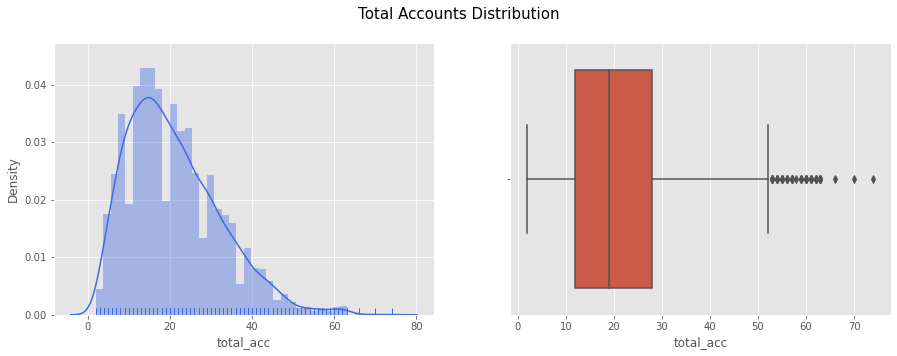

count   5345.00
mean      21.02
std       11.27
min        2.00
5%         6.00
10%        8.00
25%       12.00
50%       19.00
75%       28.00
80%       30.00
85%       33.00
90%       36.00
95%       42.00
99%       54.00
max       74.00
Name: total_acc, dtype: float64


In [37]:
# Total Open and Closed Credit Lines Distribution
Title = 'Total Accounts Distribution'
custom_boxplot_distplot(dataframe = data_charged_off_inc_norm,x_col='total_acc')

- as per understanding the total accounts would include open and closed credit lines. most of the defaulters seem to be having between 14 to 30 credit lines at any given point in time

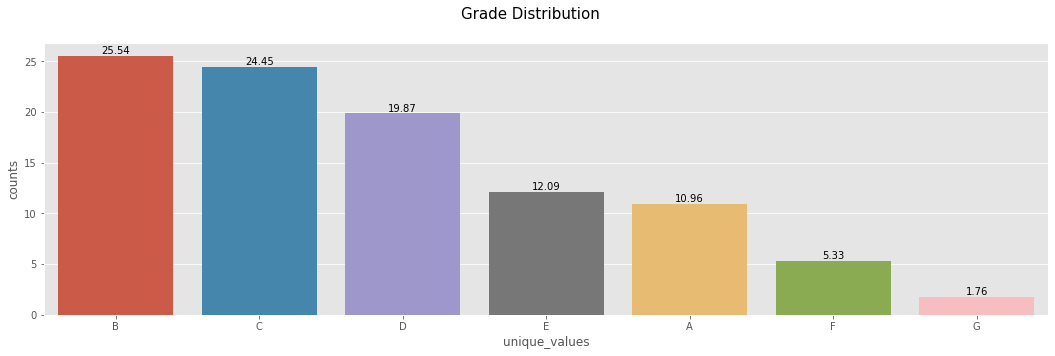

In [38]:
# Grade Distribution
Title = 'Grade Distribution'
grade_df = get_value_counts(data_charged_off_inc_norm,'grade')
custom_barplot(dataframe=grade_df[0],x_col=grade_df[1][0],y_col=grade_df[1][1],colname = grade_df[2])

- 70% of the defaulters have grade B, C & D loans. 
- Possibility to re-look at the loan grading and making it more stringent. 
- This will also require a evaluation of trade off between potential business loss if people are evaluated strigently getting lower grades and there by denied loans

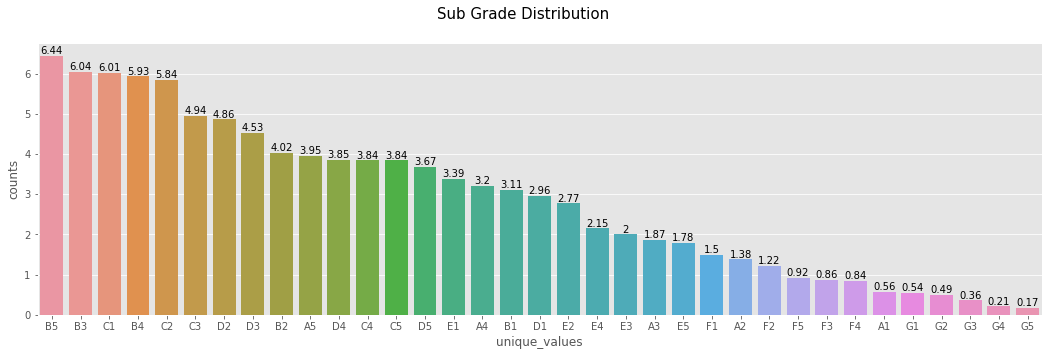

In [39]:
# Sub-Grade Distribution
Title = 'Sub Grade Distribution'
sub_grade_df = get_value_counts(data_charged_off_inc_norm,'sub_grade')
custom_barplot(dataframe=sub_grade_df[0],x_col=sub_grade_df[1][0],y_col=sub_grade_df[1][1],colname=sub_grade_df[2])

- we can see that mostly lower sub-grades (for.eg. B5, B3, C1 etc.) within the grades have a higher default

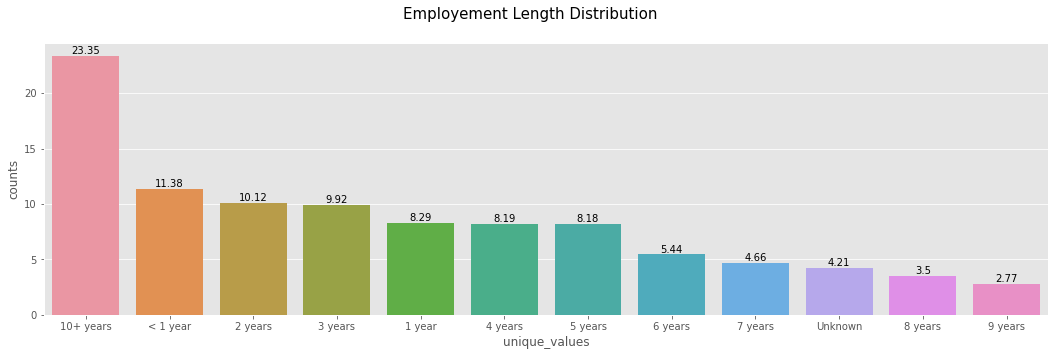

In [40]:
# Employment Length Distribution
Title = 'Employement Length Distribution'
emp_length_df = get_value_counts(data_charged_off_inc_norm,'emp_length')
custom_barplot(dataframe=emp_length_df[0],x_col=emp_length_df[1][0],y_col=emp_length_df[1][1],colname=emp_length_df[2])

- People with more than 10+ years employment experience seem to be defaulting the most. This could also be because: 
    - This could also be because these people are given a preferance and most their loans are sanctioned
    - These are people nearing retirement or retired and have lesser sources of incomes
- Apart from that bucket we can see that as the employement length increases defaulters are decreasing 

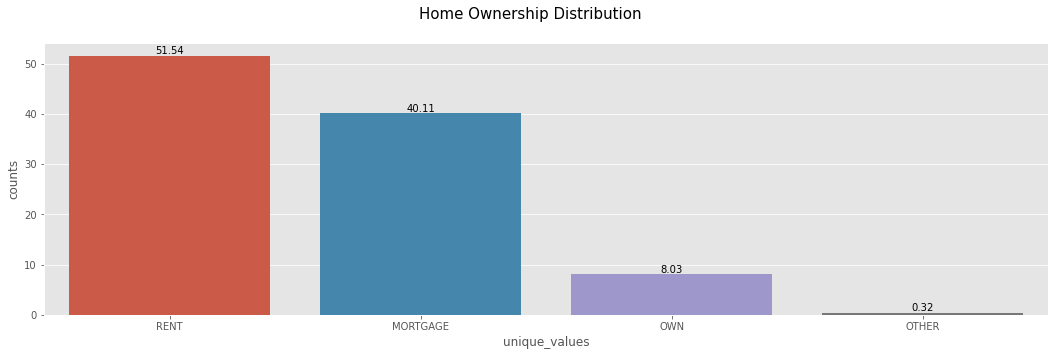

In [41]:
# Home Ownership Distribution
Title = 'Home Ownership Distribution'
home_owner_df = get_value_counts(data_charged_off_inc_norm,'home_ownership')
custom_barplot(dataframe=home_owner_df[0],x_col=home_owner_df[1][0],y_col=home_owner_df[1][1],colname=home_owner_df[2])

- An overwhelming 91% of the defaulters are either living in a rented apartment or a mortgaged house.

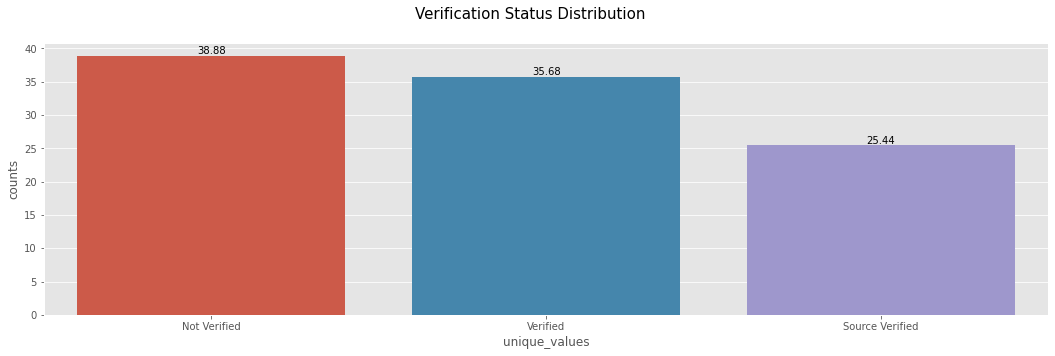

In [42]:
# Verification Status Distribution
Title = 'Verification Status Distribution'
ver_status_df = get_value_counts(data_charged_off_inc_norm,'verification_status')
custom_barplot(dataframe=ver_status_df[0],x_col=ver_status_df[1][0],y_col=ver_status_df[1][1],colname=ver_status_df[2])

- Only 25% of declared income has it's sourced verified which leads to higher chances of fraudulent declaration 

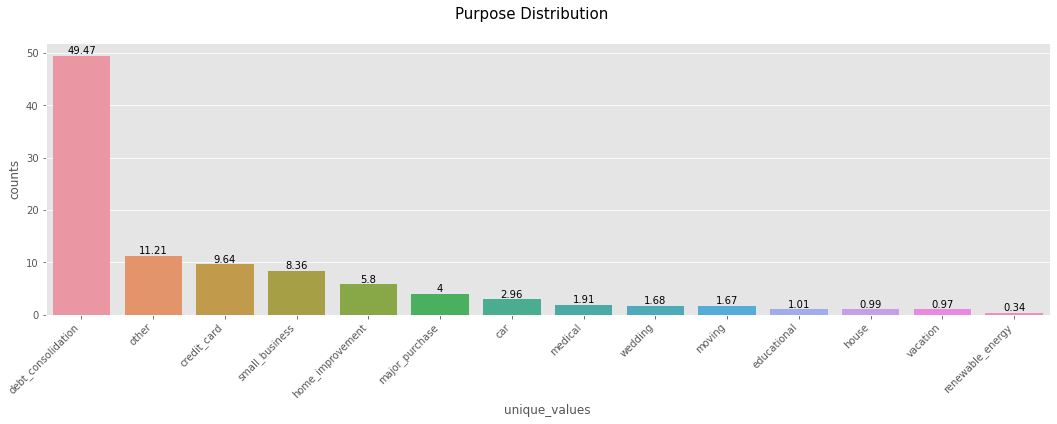

In [43]:
# Purpose Distribution
Title = 'Purpose Distribution'
purpose_df = get_value_counts(data_charged_off_inc_norm,'purpose')
custom_barplot(dataframe=purpose_df[0],x_col=purpose_df[1][0],y_col=purpose_df[1][1],colname=purpose_df[2])

- Almost 50% of the defaulters are taking loan for debt consolidation purpose which could essentially mean taking a loan to pay of other loan or liabilities.
- ~11% coming from others category which could also be a possible incorrect data categorization issue

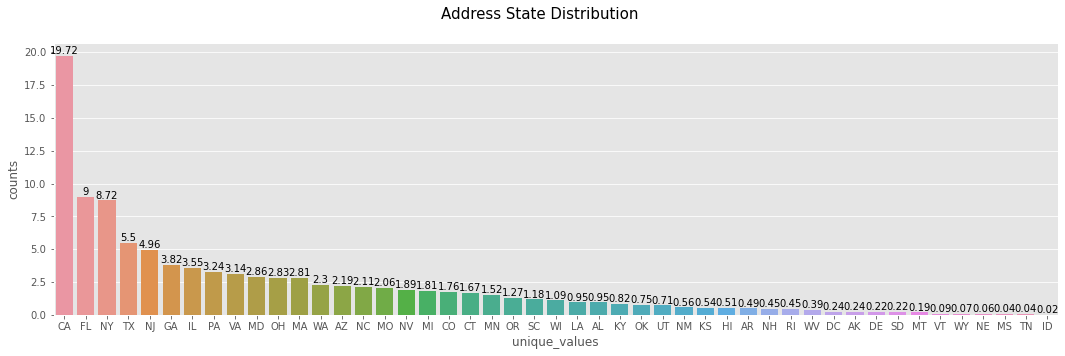

In [44]:
# Adress State Distribution
Title = 'Address State Distribution'
state_df = get_value_counts(data_charged_off_inc_norm,'addr_state')
custom_barplot(dataframe=state_df[0],x_col=state_df[1][0],y_col=state_df[1][1],colname=state_df[2])

- Top 5 states namely California, Florida, New York, Texas and New Jersey contributing ~50% of the total default

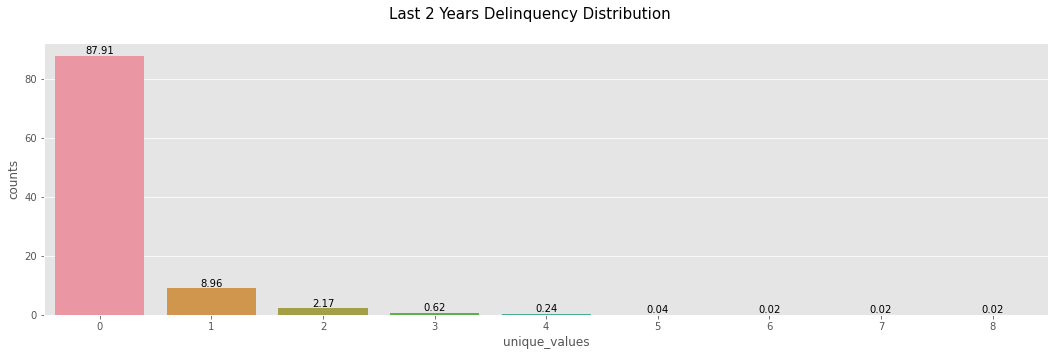

In [45]:
# Delinquency Records Distribution
Title = 'Last 2 Years Delinquency Distribution'
delinq_2_df = get_value_counts(data_charged_off_inc_norm,'delinq_2yrs')
custom_barplot(dataframe=delinq_2_df[0],x_col=delinq_2_df[1][0],y_col=delinq_2_df[1][1],colname=delinq_2_df)

- No instances of 30 days past due in the last 2 years for majority of the defaulters. So most of seem to paying their dues on time within 30 days of due date 

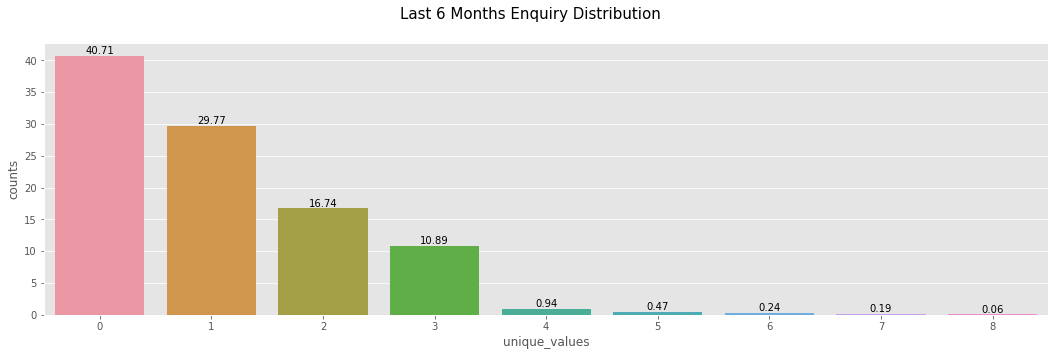

In [46]:
# Loan Enquiry Distribution
Title = 'Last 6 Months Enquiry Distribution'
last_6_mnths_enq_df = get_value_counts(data_charged_off_inc_norm,'inq_last_6mths')
custom_barplot(dataframe=last_6_mnths_enq_df[0],x_col=last_6_mnths_enq_df[1][0],y_col=last_6_mnths_enq_df[1][1],
               colname = last_6_mnths_enq_df[2])

- 60% of the defaulters have had a loan enquiry in the last 6 months. In ~30% instances more than 2 enquiries

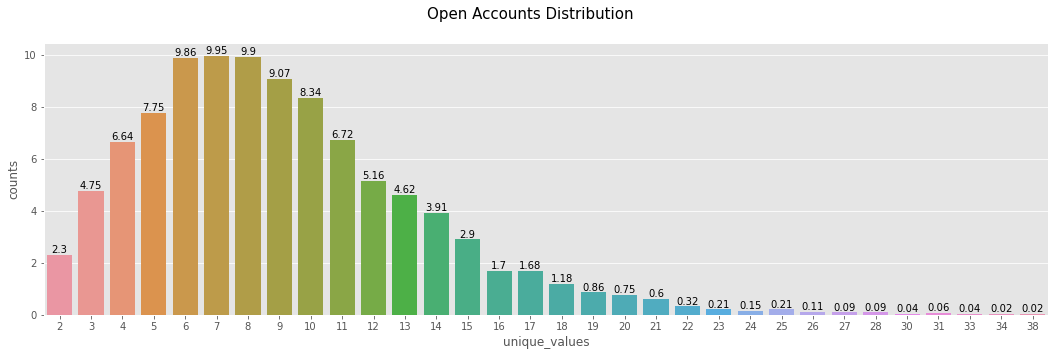

In [47]:
# Open Credit Lines Distribution
Title = 'Open Accounts Distribution'
open_acc_df = get_value_counts(data_charged_off_inc_norm,'open_acc')
custom_barplot(dataframe=open_acc_df[0],x_col=open_acc_df[1][0],y_col=open_acc_df[1][1],colname=open_acc_df[2])

- Majority of the defaulters have between 2 to 20 open credit lines 

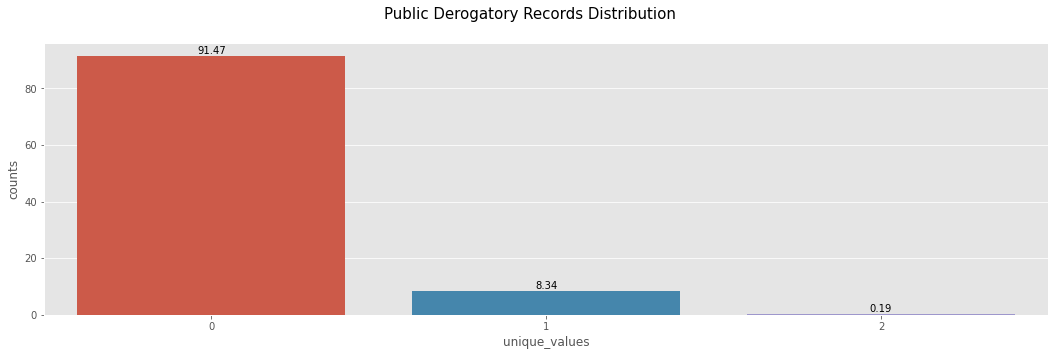

In [48]:
# Public Records Distribution
Title = 'Public Derogatory Records Distribution'
pub_rec_df = get_value_counts(data_charged_off_inc_norm,'pub_rec')
custom_barplot(dataframe=pub_rec_df[0],x_col=pub_rec_df[1][0],y_col=pub_rec_df[1][1],colname=pub_rec_df[2])

- Most of the defaulters don't have a derogatory public record in the past.
- If we go by the data most of the defaulters are __first time defaulters__.

This would normally mean that they don't have a negative item such as a late payment, a loan default, a repossession, or a foreclosure that is lublic information in the past.

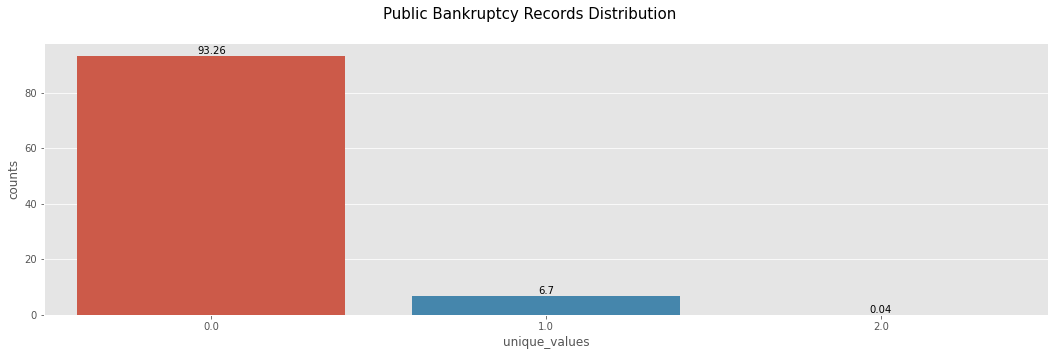

In [49]:
# Public Bankruptcy Records Distribution
Title = 'Public Bankruptcy Records Distribution'
pub_bkrptcy_rec_df = get_value_counts(data_charged_off_inc_norm,'pub_rec_bankruptcies')
custom_barplot(dataframe=pub_bkrptcy_rec_df[0],x_col=pub_bkrptcy_rec_df[1][0],y_col=pub_bkrptcy_rec_df[1][1],
               colname=pub_bkrptcy_rec_df[2])

- This chart validates the finding of the previous chart

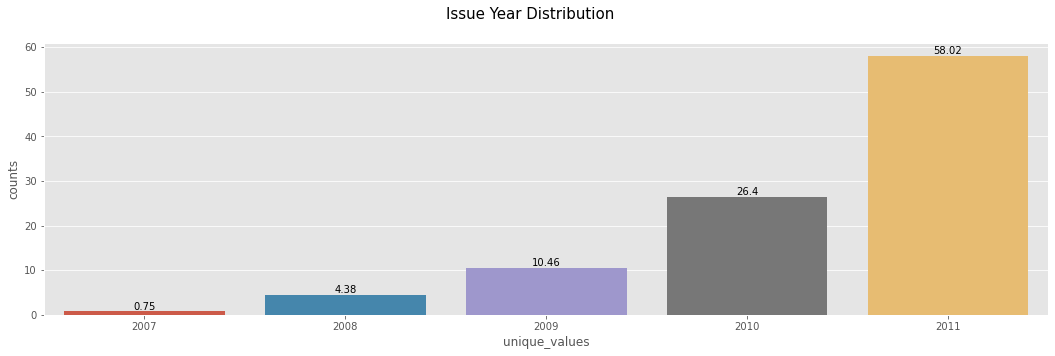

In [50]:
# Loan Issue Year Distribution
Title = 'Issue Year Distribution'
issue_d_year_df = get_value_counts(data_charged_off_inc_norm,'issue_year')
custom_barplot(dataframe=issue_d_year_df[0],x_col=issue_d_year_df[1][0],y_col=issue_d_year_df[1][1],
               colname=issue_d_year_df[2])

- More than half the defaulters were issued loan in 2011

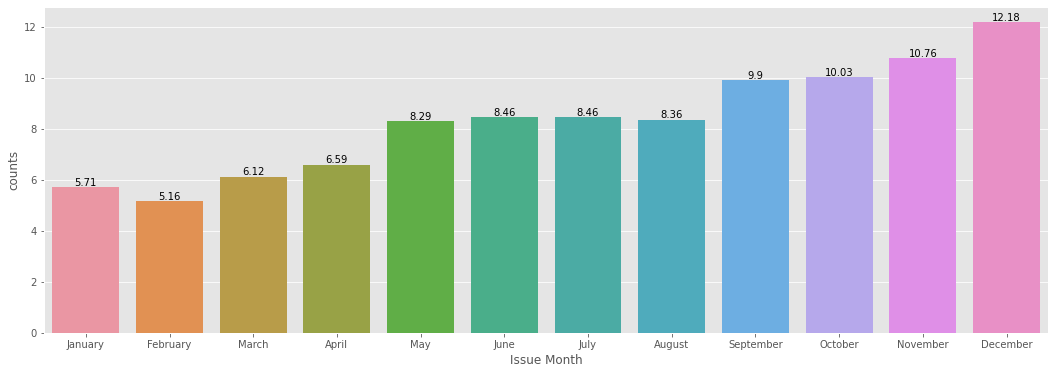

In [51]:
# Loan Issue Month Distribution
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',
'December']
Title = 'Issue Month Distribution'
issue_d_mth_df = get_value_counts(data_charged_off_inc_norm,'issue_month')
plt.figure(figsize=(18,6))
ax = sns.barplot(data=issue_d_mth_df[0],x=issue_d_mth_df[1][0],y=issue_d_mth_df[1][1],order=month_list)
ax.bar_label(ax.containers[0])
plt.xlabel('Issue Month')
plt.ylabel(issue_d_mth_df[1][1])
plt.show()

- Default rate increases as the year progesses

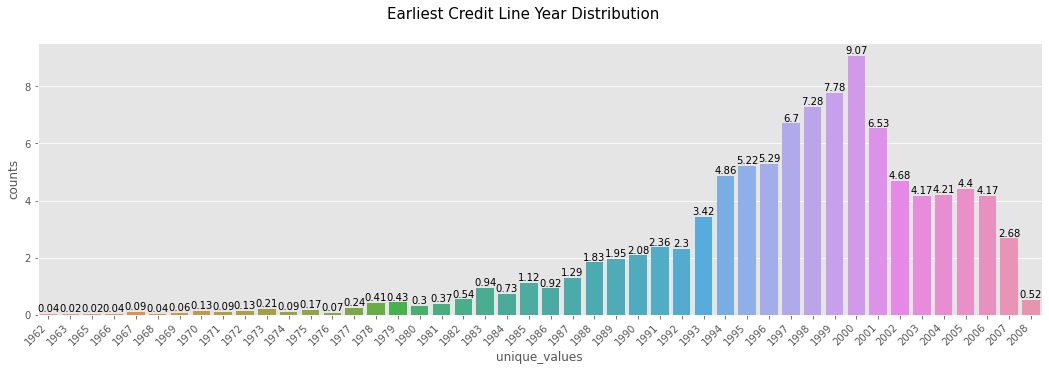

In [52]:
# Earliest Credit Line Year Distribution
Title = 'Earliest Credit Line Year Distribution'
er_cred_line_yr_df = get_value_counts(data_charged_off_inc_norm,'earliest_cred_line_year')
custom_barplot(dataframe=er_cred_line_yr_df[0],x_col=er_cred_line_yr_df[1][0],y_col=er_cred_line_yr_df[1][1],
               colname=er_cred_line_yr_df[2])

- Majority of the defaulters have their credit lines starting from the late 80s with the number peaking in 2000. Assuming that the person needs to 18 years and above to take a loan can we say that people started to take more loans as the credit industry became more structured. 

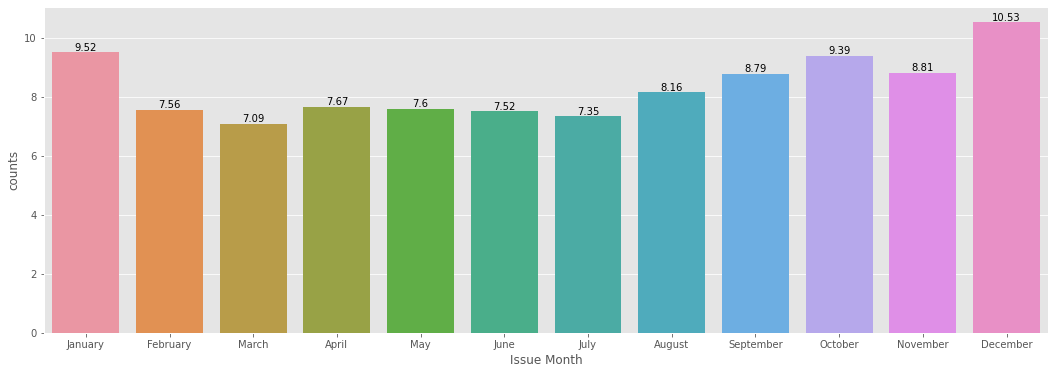

In [53]:
# Earliest Credit Line Month Distribution
Title = 'Earliest Credit Line Month Distribution'
er_cred_line_mnth_df = get_value_counts(data_charged_off_inc_norm,'earliest_cred_line_month')
plt.figure(figsize=(18,6))
ax = sns.barplot(data=er_cred_line_mnth_df[0],x=er_cred_line_mnth_df[1][0],y=er_cred_line_mnth_df[1][1],order=month_list)
ax.bar_label(ax.containers[0])
plt.xlabel('Issue Month')
plt.ylabel(issue_d_mth_df[1][1])
plt.show()

- Nothing conclusive from the above chart

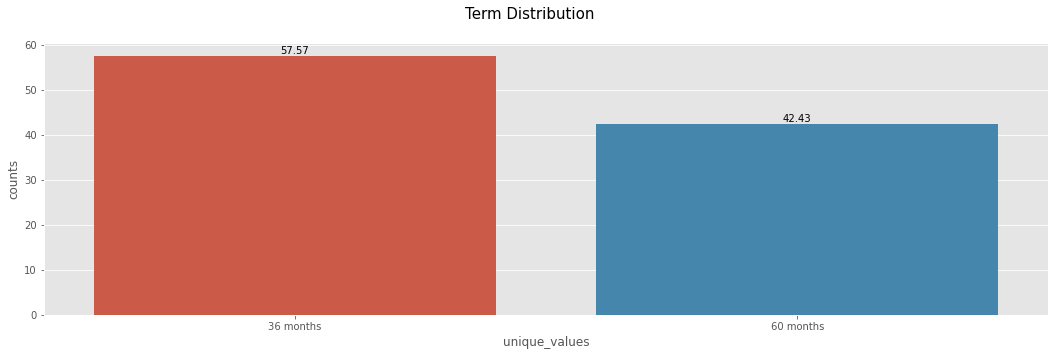

In [54]:
# Term Distribution
Title = 'Term Distribution'
term_df = get_value_counts(data_charged_off_inc_norm,'term')
custom_barplot(dataframe=term_df[0],x_col=term_df[1][0],y_col=term_df[1][1],colname=term_df[2])

- More than half of the defaulters have 36 months term

#### Segmented Univariate Analysis

We will start with looking at comparison of various parameters between fully paid and charged off customers

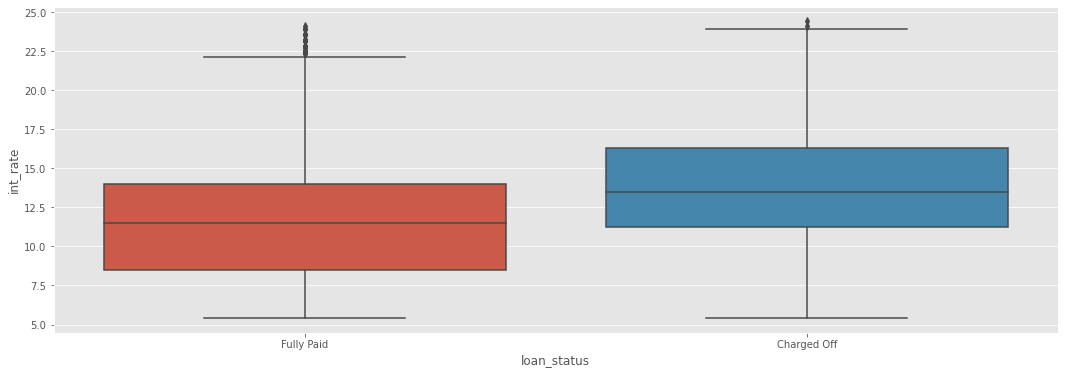

In [55]:
# Loan status and interest rate comparison
plt.figure(figsize=(18,6))
sns.boxplot(data=data_paid_charged_off_inc_norm,x='loan_status',y='int_rate')
plt.show()    

- Charged off customers seemed to be paying higher interest than the fully paid customers. 
- Would higher interest rate be one of the reasons of default ?

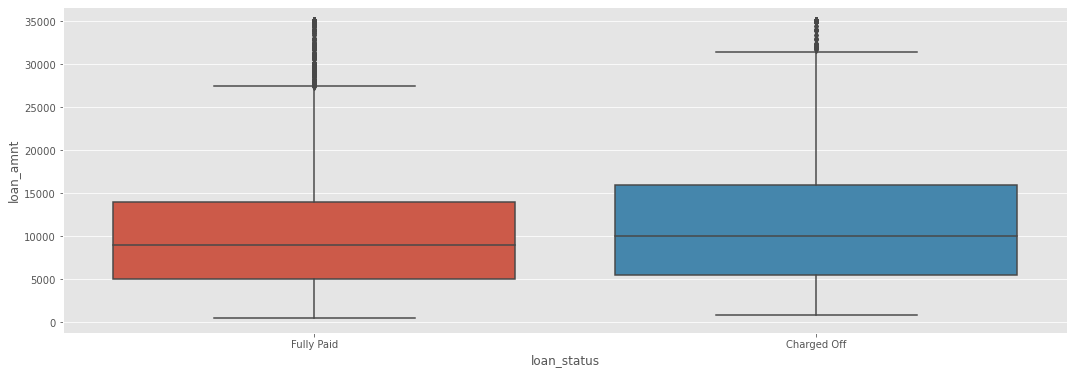

In [56]:
# Loan status and loan amount comparison
plt.figure(figsize=(18,6))
sns.boxplot(data=data_paid_charged_off_inc_norm,x='loan_status',y='loan_amnt')
plt.show() 

- Charged off borrowers are also to be applying for a higher loan amount in comparison.

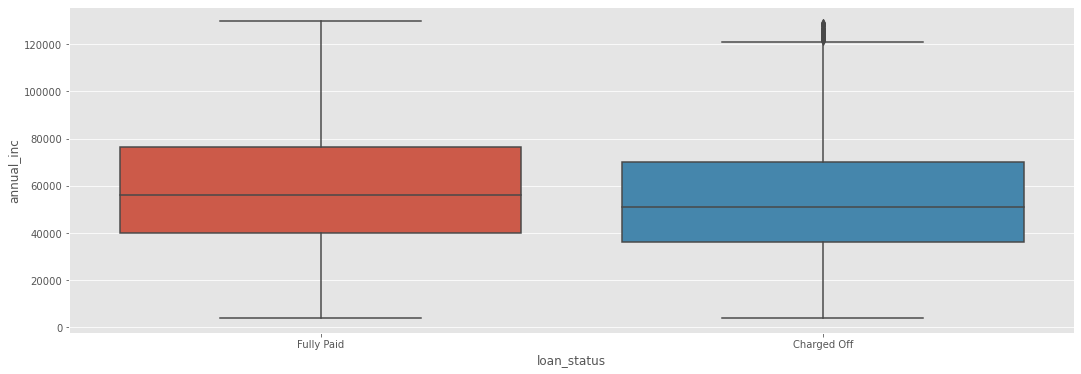

In [57]:
# Loan status and annual income comparison
plt.figure(figsize=(18,6))
sns.boxplot(data=data_paid_charged_off_inc_norm,x='loan_status',y='annual_inc')
plt.show()

- Charged off borrowers having lower income than fully paid borrowers

Looking at impact of Income levels on default rate

In [58]:
# creating data sets for income levels more than and less than 75% income threshold
data_paid_charged_off_inc_less_than_70k = data_paid_charged_off_inc_norm[data_paid_charged_off_inc_norm.annual_inc<70000]
data_paid_charged_off_inc_more_than_70k = data_paid_charged_off_inc_norm[data_paid_charged_off_inc_norm.annual_inc>70000]

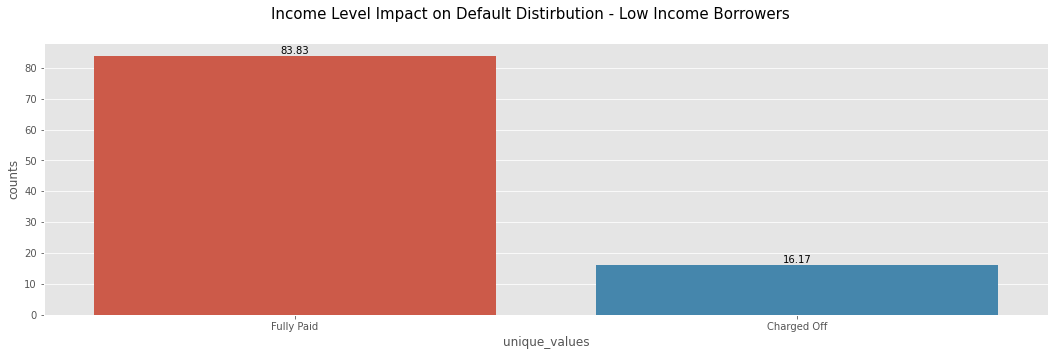

In [59]:
# Creating barplot for loan status distribution for lower income borrowers
Title = 'Income Level Impact on Default Distirbution - Low Income Borrowers'
inc_less_than_70k_df = get_value_counts(data_paid_charged_off_inc_less_than_70k,'loan_status')
custom_barplot(dataframe=inc_less_than_70k_df[0],x_col=inc_less_than_70k_df[1][0],
               y_col=inc_less_than_70k_df[1][1],colname=inc_less_than_70k_df[2])

- Default rate increases slightly for lower income levels

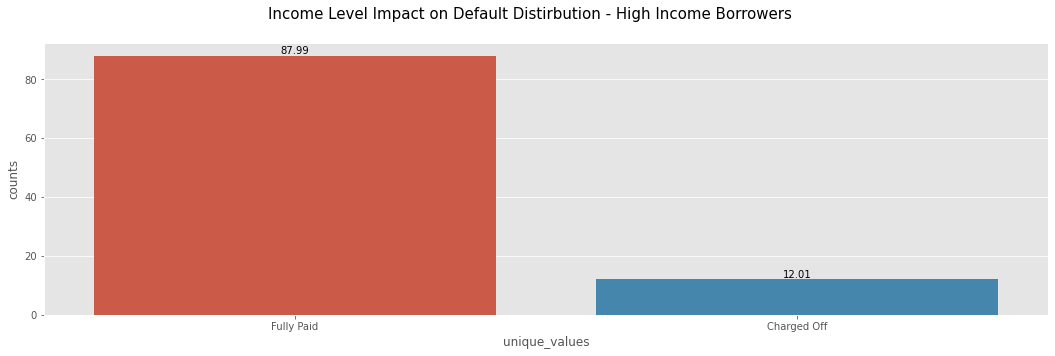

In [60]:
# Creating barplot for loan status distribution for higher income borrowers
Title = 'Income Level Impact on Default Distirbution - High Income Borrowers'
inc_more_than_70k_df = get_value_counts(data_paid_charged_off_inc_more_than_70k,'loan_status')
custom_barplot(dataframe=inc_more_than_70k_df[0],x_col=inc_more_than_70k_df[1][0],
               y_col=inc_more_than_70k_df[1][1],colname=inc_more_than_70k_df[2])

- Default rate goes down considerably (by ~400 bps) for higher income levels. This is quite intuitive.

 Comparing debt to income ratio across salary levels

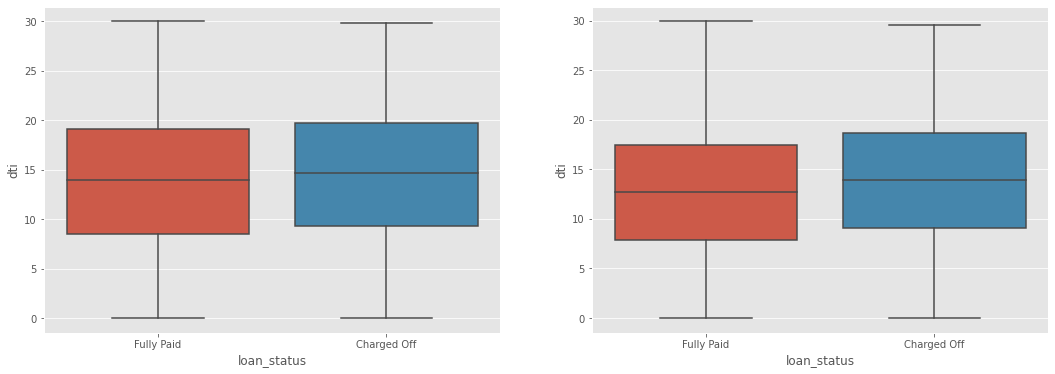

In [61]:
# Creating comparisonn boxplots for dti distribution for across income levels
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(data=data_paid_charged_off_inc_less_than_70k,x='loan_status',y='dti')
plt.subplot(1,2,2)
sns.boxplot(data=data_paid_charged_off_inc_more_than_70k,x='loan_status',y='dti')
plt.show()

- Defaulters with lower salary levels have a high debt to income ratio 

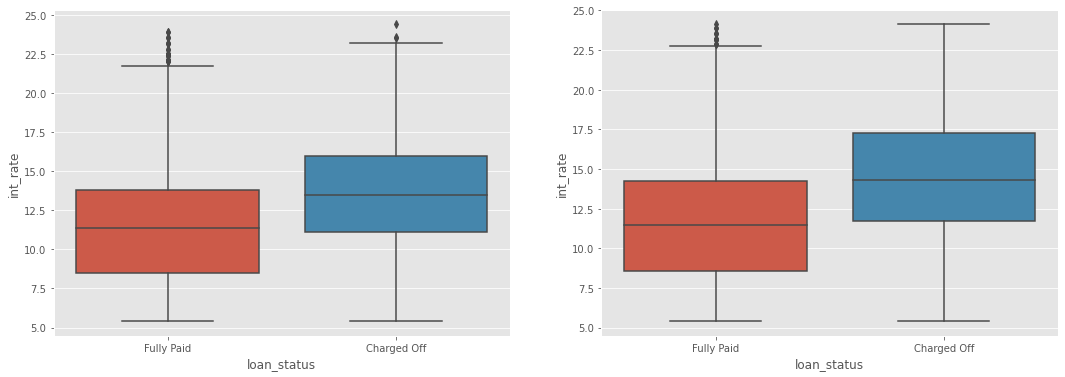

In [62]:
# Creating comparisonn boxplots for dti distribution for across income levels
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(data=data_paid_charged_off_inc_less_than_70k,x='loan_status',y='int_rate')
plt.subplot(1,2,2)
sns.boxplot(data=data_paid_charged_off_inc_more_than_70k,x='loan_status',y='int_rate')
plt.show()

- Defaulters having higher income levels are paying higher interest rate

#### Bi-Variate & Multivariate Analysis

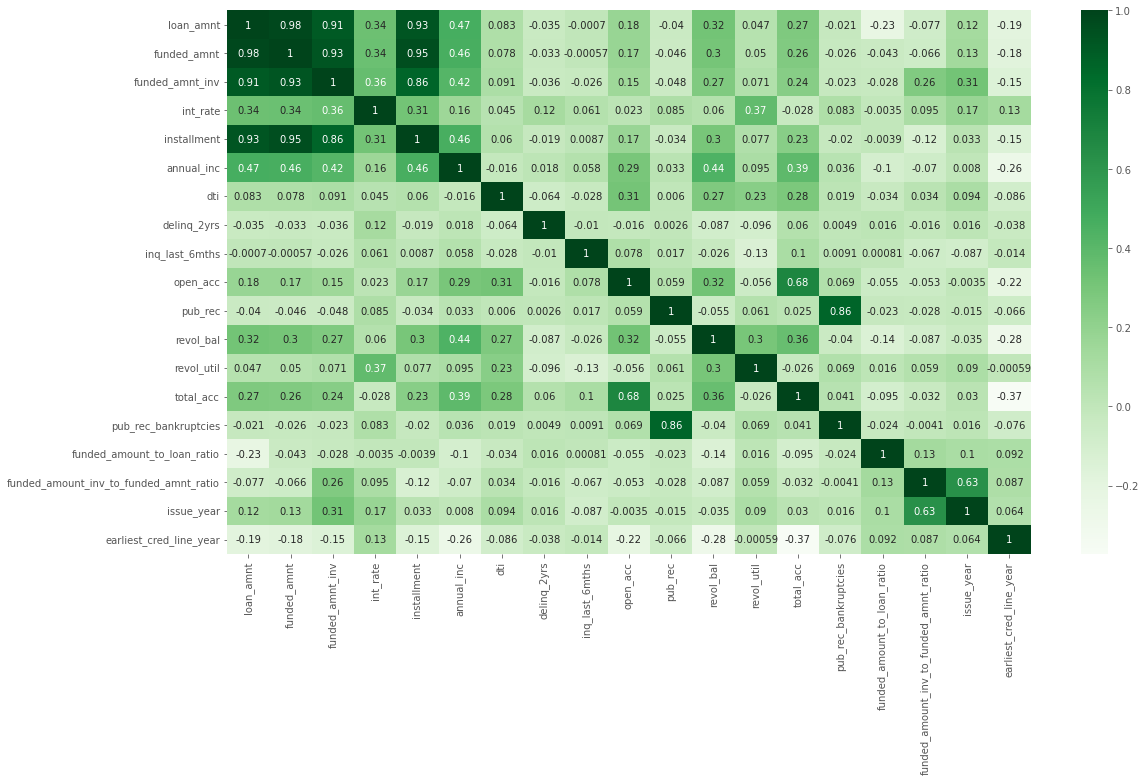

In [63]:
# Checking for correlation
data_charged_off_inc_norm_corr = data_charged_off_inc_norm.corr()
plt.figure(figsize=(18,10))
sns.heatmap(data_charged_off_inc_norm_corr, cmap = "Greens", annot=True)
plt.show()

 - Correlation does not provide any addtional insight. Most of the high correlations are intuitive.

In [64]:
# Defaulter distribution across Verfication Status and Grade
pd.pivot_table(data=data_charged_off_inc_norm,values='loan_status',index='verification_status',
               columns='grade',aggfunc='count')

grade,A,B,C,D,E,F,G
verification_status,,,,,,,
Not Verified,309,602,575,393,140,42,17
Source Verified,138,344,303,299,170,81,25
Verified,139,419,429,370,336,162,52


- Defaulters are high for Not Verified and Verified status for B, C and D grades 

In [65]:
# Defaulter distribution across Home Ownership and Grade
pd.pivot_table(data=data_charged_off_inc_norm,values='loan_status',index='home_ownership',
               columns='grade',aggfunc='count')

grade,A,B,C,D,E,F,G
home_ownership,,,,,,,
MORTGAGE,255.00,553.00,516.00,400.00,256.00,128.00,36.00
OTHER,2.00,5.00,2.00,5.00,2.00,1.00,NaN
OWN,52.00,112.00,106.00,77.00,49.00,22.00,11.00
RENT,277.00,695.00,683.00,580.00,339.00,134.00,47.00


- Defaulters are high for mortgaged and rented properties for B, C and D grades

In [66]:
# Defaulter distribution across Verfication Status and Grade
pd.pivot_table(data=data_charged_off_inc_norm,values='loan_status',index='home_ownership'
               ,columns='verification_status',aggfunc='count')

verification_status,Not Verified,Source Verified,Verified
home_ownership,,,
MORTGAGE,800,446,898
OTHER,10,1,6
OWN,182,113,134
RENT,1086,800,869


- Deafulters are almost double for verified income borrowers between mortgaged and rented properties 

In [67]:
# Defaulter distribution across Purpose and Verfication Status
pd.pivot_table(data=data_charged_off_inc_norm,values='loan_status',index='purpose'
               ,columns='verification_status',aggfunc='count')

verification_status,Not Verified,Source Verified,Verified
purpose,,,
car,68,51,39
credit_card,197,131,187
debt_consolidation,916,652,1076
educational,37,4,13
home_improvement,136,77,97
house,23,16,14
major_purchase,96,62,56
medical,50,29,23
moving,31,44,14


- Debt Consolidation by far the riskiest purpose across income verification categories

In [68]:
# Defaulter distribution across Purpose and Home Ownership
pd.pivot_table(data=data_charged_off_inc_norm,values='loan_status',index='purpose'
               ,columns='home_ownership',aggfunc='count')

home_ownership,MORTGAGE,OTHER,OWN,RENT
purpose,,,,
car,68.00,1.00,15.00,74.00
credit_card,214.00,2.00,37.00,262.00
debt_consolidation,1070.00,6.00,190.00,1378.00
educational,11.00,NaN,5.00,38.00
home_improvement,233.00,1.00,39.00,37.00
house,15.00,NaN,3.00,35.00
major_purchase,70.00,NaN,26.00,118.00
medical,40.00,NaN,10.00,52.00
moving,8.00,1.00,6.00,74.00


- People living in reneted properties with debt consolidation highest contribution to default

### Major Observations & Conclusions:

- __Factors Impacting Default__
    - Most of the applied loan amounts are committed and disbursed. Possible review required for the sanction process.
    - Higher interest could be one of the major factors leading to default
    - Debt to income ratio is less than 30 which is the acceptable value in the industry.
    - Most of the borrowers have not had any reported delinquencies in the last 2 years.
    - There are multiple open credit lines which means for the borrowers which could be cause of concerns
    - Revolving balance seems to a bit high. This is in a way is good for LC as revolving balance accrues interest, but higher revolving balance may indicate that a borrower is relying too much on credit which can hurt his credit score.
    - Revolving utilization rate compares your credit debt to your total credit limit, and it is normally recommended to keep the utilization rate as low as possible with anything below 30% considered acceptable. The data suggests that utilization is in the range of 30% to 80% which could again be a cause of concern.
    - Possibility to re-look at the loan grading and making it more stringent. This will also require an evaluation of trade off between potential business loss if people are evaluated stringently getting lower grades and there by denied loans
    - Only 25% of declared income has it's sourced verified which leads to higher chances of fraudulent declaration. This the verification process requires a closer look.



- __Generic Profile of a Defaulter__
    - Having income below 70k.
    - People with more than 10+ years employment experience seem to be defaulting the most. Apart from this bucket we can see that as the employment length increases defaulters are decreasing.
    - Having a rented apartment or a mortgaged house.
    - Applicants from either of these 5 states namely California, Florida, New York, Texas and New Jersey. Although this is not a clinching factor.
    - Have had a loan enquiry in the last 6 months.
    - Have between 2 to 20 open credit lines.
    - Don't have any derogatory public record in the past making them first time defaulters (as per the data).
    - Don't have any public delinquency record in the past.
    - Having known earlier credit lines starting from the late 80s till about 2000.
    - Opting for short term loans.
